In [1]:
#import relevant libraries
#Load modules
import os
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
import dabest
from struct import *
import osar
import scipy as sp
import re
import dabest
import warnings
warnings.simplefilter(action="ignore", category=RuntimeWarning)
warnings.simplefilter(action="ignore", category=FutureWarning)
#warnings.simplefilter(action="default", category=RuntimeWarning)


## __COMPUTER TYPE__


In [2]:
#typeo = "C:\\Users\\user\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\DATA\\osar_test\\"
#typeo = "C:\\Users\\lnico\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\DATA\\osar_test\\"
typeo = "D:\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\DATA\\osar_test\\"
genot = "Special"
typeob = typeo + genot + "\\"

## __RUN ONLY IF YOU HAVE NEW DATA__


In [6]:
#nicole's data (only run if no comp set)
root = typeob
startdir = os.listdir(root)
baseDirectory=[]
basegenotype=[]
for n,sd in enumerate(startdir):
    dir1 = os.path.join(root, os.listdir(root)[n])
    baseDirectory.append(dir1)
    basegenotype.append(re.search(r'^.*?(?= x )', (os.path.split(dir1)[1])).group(0))
    #basegenotype.append(re.search(r'^.*?(?=-Gal4)', (os.path.split(dir1)[1])).group(0))
        
        
dfs=[]
for loc,name in zip(baseDirectory,basegenotype):
    dfs.append(osar.osar(loc,driver = name).results)

Creating borders for each fly...
Done.

Processing CSV 44 of 44
Summarising results for all flies...
All done.
Creating borders for each fly...
Done.

Processing CSV 34 of 34
Summarising results for all flies...
All done.
Creating borders for each fly...
Done.

Processing CSV 31 of 31
Summarising results for all flies...
All done.


In [7]:
df=pd.concat(dfs)
filepath = typeob+ "compilation_full.csv"
df.to_csv(filepath)
#df.to_csv('D:\\Nicole Lee - HDD\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\DATA\\osar_test\\ACRcompilation_full.csv')


## __RUN THIS IF OLD DATA SET__

In [3]:
filepath = typeob + "compilation_full.csv"
df2= pd.read_csv(filepath)

basegenotype = df2['driver'].unique()

In [4]:
import scikits.bootstrap as skb
from osar.plot_helpers.plot_helpers import r2_and_slope

In [5]:
#dfi=df2[(df2['light_intensity']=='Half') | (df2['light_intensity']=='Full')].copy()
dfi=df2[(df2['light_intensity']=='Full')].copy()
dfi.replace([np.inf, -np.inf], np.nan, inplace=True)
dfi.rename(columns={'driver': 'MBON'}, inplace = True)

In [6]:
parameter = 'pi_smoothed_Pattern 01'
#parameter = 'log2_speed_ratio_Pattern 01'

if parameter == 'log2_speed_ratio_Pattern 01':
    yaxi = 'Log2 Speed Ratio'
else:
    yaxi = 'PI'

In [22]:
dfi['genotype'].unique()

array(['w1118 x Chrimson2', 'w1118 x VT999036', 'VT999036 x Chrimson2',
       'w1118 x Tsh-Chrimson2', 'VT999036 x Tsh-Chrimson2',
       'w1118 x TubTsh-Chrimson2', 'VT999036 x TubTsh-Chrimson2'],
      dtype=object)

In [7]:
dfr1 = pd.DataFrame()
for names in basegenotype:
    dfrr = pd.DataFrame()
    filter1 = dfi[(dfi['MBON'] == names) & (dfi['status'] == 'Offspring')].copy().reset_index(drop=True)
    filter2 = dfi[(dfi['MBON'] == names) & (dfi['status'] == 'Sibling')].copy().reset_index(drop=True)
    
    dfrr[names + " Cntrl" ] = filter2[parameter]
    dfrr[names] = filter1[parameter]
    dfr1 = pd.concat([dfr1, dfrr], axis = 1)

In [8]:
#changed
lst = dfi['genotype'].unique().tolist()

dfr1 = pd.DataFrame()
for names in lst:
    dfrr = pd.DataFrame()
    respondertype = names.split(" ")[2]
    
    if "w1118" in names:
        filter1 = dfi[(dfi['genotype'] == names)].copy().reset_index(drop=True)
        dfrr[respondertype + " Cntrl" ] = filter1[parameter]
        
    else:
        filter1 = dfi[(dfi['genotype'] == names)].copy().reset_index(drop=True)
        dfrr[respondertype] = filter1[parameter]
    
    dfr1 = pd.concat([dfr1, dfrr], axis = 1)

In [35]:
# l = dfr1.columns.tolist()
# titlelst = list(zip(l,l[1:]))[::2]    

In [36]:
finaldf = pd.DataFrame()
finaldf['CsChr sibling'] = pd.concat([dfr1['Chrimson2 Cntrl'], dfr1['VT999036 Cntrl']])
finaldf['Tsh-CsChr sibling'] = pd.concat([dfr1['Tsh-Chrimson2 Cntrl'], dfr1['VT999036 Cntrl']])
finaldf['TubTsh-CsChr sibling'] = pd.concat([dfr1['TubTsh-Chrimson2 Cntrl'], dfr1['VT999036 Cntrl']])

finaldf['VT999036 > CsChr'] = dfr1['Chrimson2']
finaldf['VT999036 > Tsh-CsChr'] = dfr1['Tsh-Chrimson2']
finaldf['VT999036 > TubTsh-CsChr'] = dfr1['TubTsh-Chrimson2']

titlelstspecial = [('CsChr sibling', 'VT999036 > CsChr'), ('Tsh-CsChr sibling', 'VT999036 > Tsh-CsChr'), ('TubTsh-CsChr sibling', 'VT999036 > TubTsh-CsChr')]

In [18]:
finaldf = pd.DataFrame()
finaldf['cntrl x CsChrimson'] = pd.concat([dfr1['Chrimson2 Cntrl'], dfr1['VT999036 Cntrl']])
finaldf['cntrl x Tsh-CsChrimson'] = pd.concat([dfr1['Tsh-Chrimson2 Cntrl'], dfr1['VT999036 Cntrl']])
finaldf['cntrl x TubTsh-CsChrimson'] = pd.concat([dfr1['TubTsh-Chrimson2 Cntrl'], dfr1['VT999036 Cntrl']])

finaldf['VT999036 x CsChrimson'] = dfr1['Chrimson2']
finaldf['VT999036 x Tsh-CsChrimson'] = dfr1['Tsh-Chrimson2']
finaldf['VT999036 x TubTsh-CsChrimson'] = dfr1['TubTsh-Chrimson2']

titlelstspecial = [('cntrl x CsChrimson', 'VT999036 x CsChrimson'), ('cntrl x Tsh-CsChrimson', 'VT999036 x Tsh-CsChrimson'), ('cntrl x TubTsh-CsChrimson', 'VT999036 x TubTsh-CsChrimson')]

c:\Users\user\anaconda3\lib\site-packages\dabest\plot_tools.py:1232: UserWarning: 20.8% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
c:\Users\user\anaconda3\lib\site-packages\dabest\plot_tools.py:1232: UserWarning: 38.9% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
c:\Users\user\anaconda3\lib\site-packages\dabest\plot_tools.py:1232: UserWarning: 11.7% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)


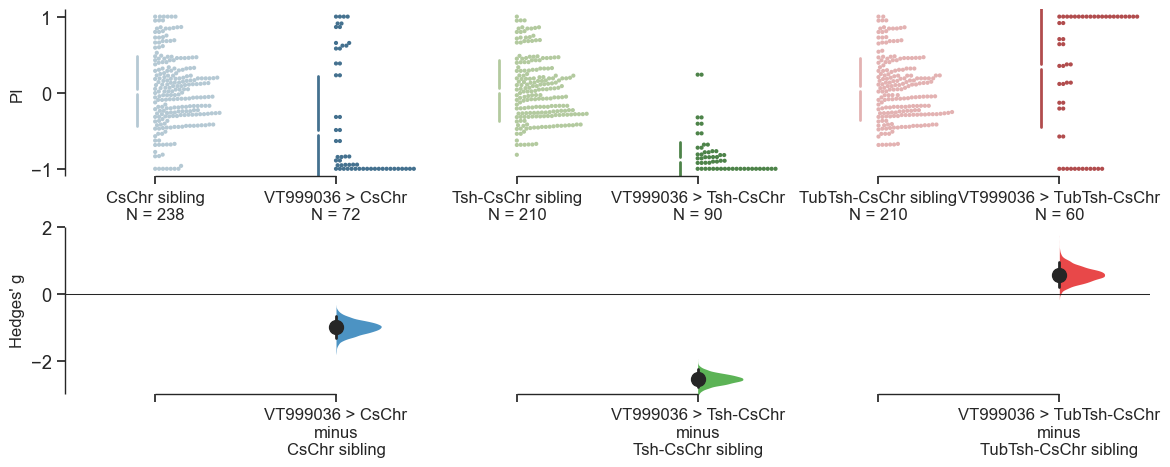

In [43]:
test = dabest.load(finaldf, idx=titlelstspecial, ci=90)

f, axx = plt.subplots(figsize=(14,5))

test.delta_g.plot(float_contrast=False, raw_marker_size=1, es_marker_size=10, custom_palette="Paired", swarm_label=yaxi, contrast_ylim=(-3,2), fontsize_rawxlabel=12, ax = axx);
# sns.set(font_scale=1.2,  style='ticks')


In [36]:
filename = typeo + 'compilation_' + genot + '_valence_Full_light'
compilationplt.savefig(filename + '.png', bbox_inches="tight", dpi=300)

# __Regression plot__

In [ ]:
#import plotly.express as px
import seaborn as sns
df= df2
dfi=df2[(df2['light_intensity']=='Half')|(df2['light_intensity']=='Full') & (df2['status'] == 'Offspring')].copy()
dfi.replace([np.inf, -np.inf], np.nan, inplace=True)
dfi.rename(columns={'driver': 'MBON'}, inplace = True)
nama = ['VT999036',"MB112C", "MB323B", 'MB093C', "R76", "MB434B"]
dfx = pd.DataFrame()

for each in nama:
    dfy = dfi[(dfi['MBON'] == each)]
    dfx = pd.concat([dfx, dfy])

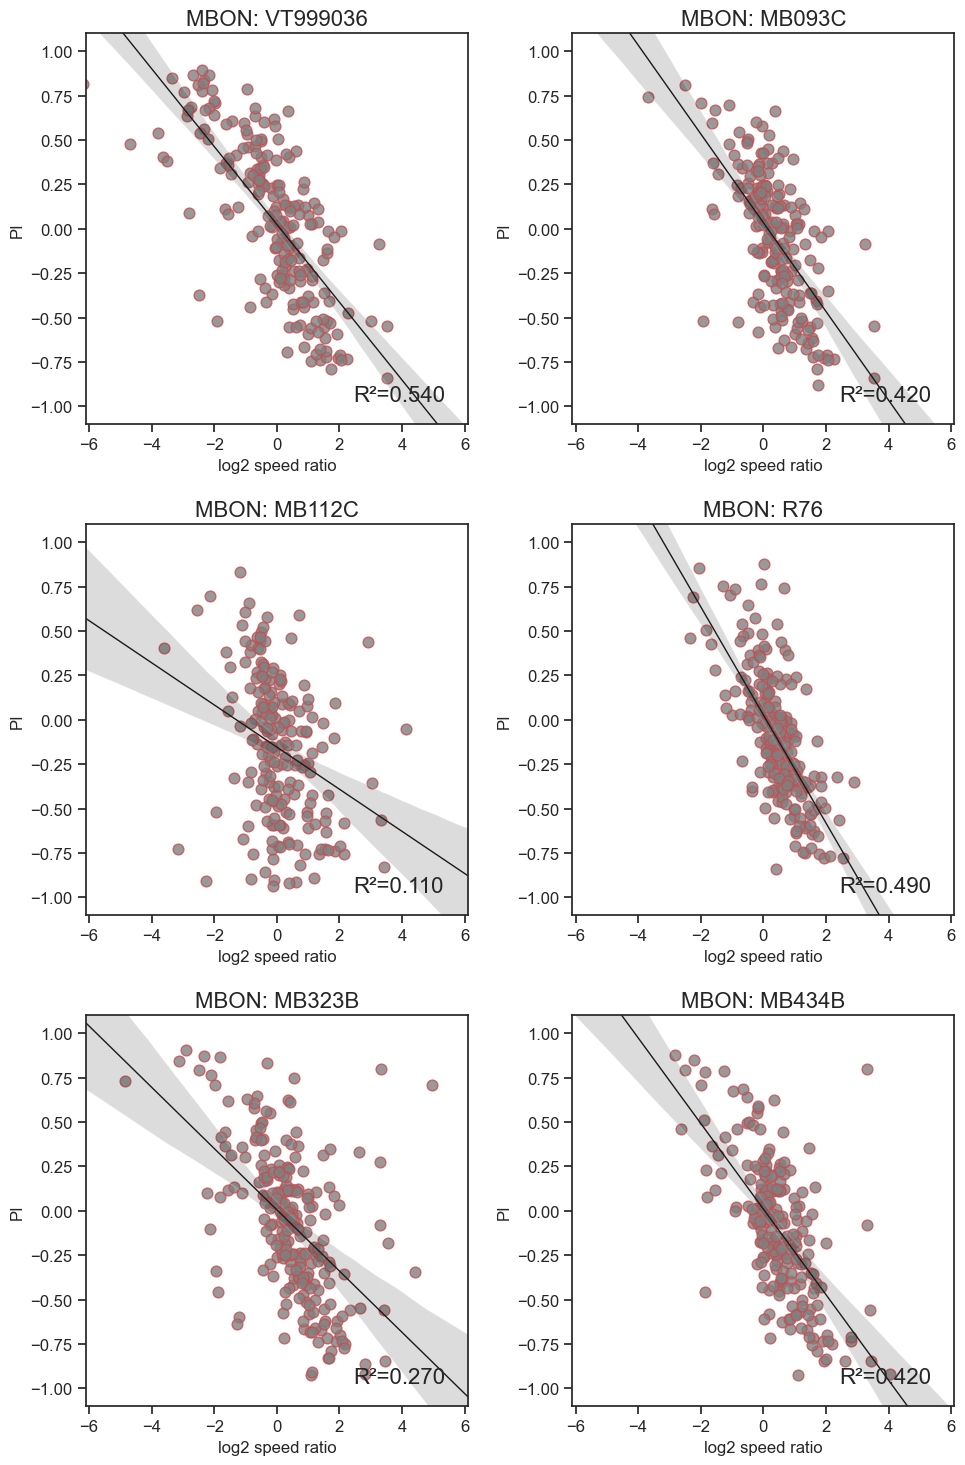

In [ ]:
osar_data = dfx
dfrrr = pd.DataFrame()
sns.set(style='ticks', font_scale=1.5)
decimal_places = 2

#f, ax = plt.subplots(nrows=4, ncols=3,figsize=(20,20))
#f, ax = plt.subplots(nrows=3, ncols=2,figsize=(10,10))  #Chrimson2
f, ax = plt.subplots(nrows=3, ncols=2,figsize=(10,15))  #ACR

#for name,row,col in zip(basegenotype,3*[0,1,2],3*[0]+3*[1]+3*[2]): #Chrimson2
for name,row,col in zip(nama,3*[0,1,2],3*[0]+3*[1]+3*[2]): #ACR

    ax[row][col].set_ylim(-1.1,1.1)  
    ax[row][col].set_xlim(-6.1,6.1,2) 
    ax[row][col].tick_params(axis='x', labelsize= 12)
    ax[row][col].tick_params(axis='y', labelsize= 12)
    df=osar_data[osar_data['MBON']==name]
    ax[row][col].scatter(df['log2_speed_ratio_Pattern 01'], 
                df['pi_smoothed_Pattern 01'],
                color='grey',
                edgecolors="r",
                alpha=0.8,
                s=60)
    
    sns.regplot(df['log2_speed_ratio_Pattern 01'],
                df['pi_smoothed_Pattern 01'],
                scatter=False,
                line_kws={'lw':1}, 
                color="k",
                ax=ax[row][col],
                truncate=False)
    
    
    
    x = df['log2_speed_ratio_Pattern 01'].to_numpy()
    y = df['pi_smoothed_Pattern 01'].to_numpy()

    finiteMask = np.isfinite([x, y]).all(axis=0)
    
    corr = sp.stats.linregress(x[finiteMask], y[finiteMask])
    lowers, uppers = skb.ci((x[finiteMask], y[finiteMask]), 
                            statfunction=r2_and_slope, 
                            n_samples=3000)
    
    r2 = np.round(corr.rvalue**2, decimal_places)
    r2_lower = np.round(lowers[0], decimal_places)
    r2_upper = np.round(uppers[0], decimal_places)

    ax[row][col].annotate('R\u00b2='+str("{:.3f}".format(r2)), 
                     xy=(0.70, 0.05),  # xy coords
                     xycoords='axes fraction',
                     ha='left', va='bottom',
                     fontsize=16)
    ax[row][col].set_ylabel('PI', fontsize=12)
    ax[row][col].set_xlabel('log2 speed ratio', fontsize=12)
    ax[row][col].set_title("MBON: "+ name, fontsize = 16)
    

plt.tight_layout()

#plt.savefig("C:\\Users\\lnico\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\DATA\\osar_test\\Figure\\regressionhalffull202230101.png")

IndexError: index 3 is out of bounds for axis 0 with size 3

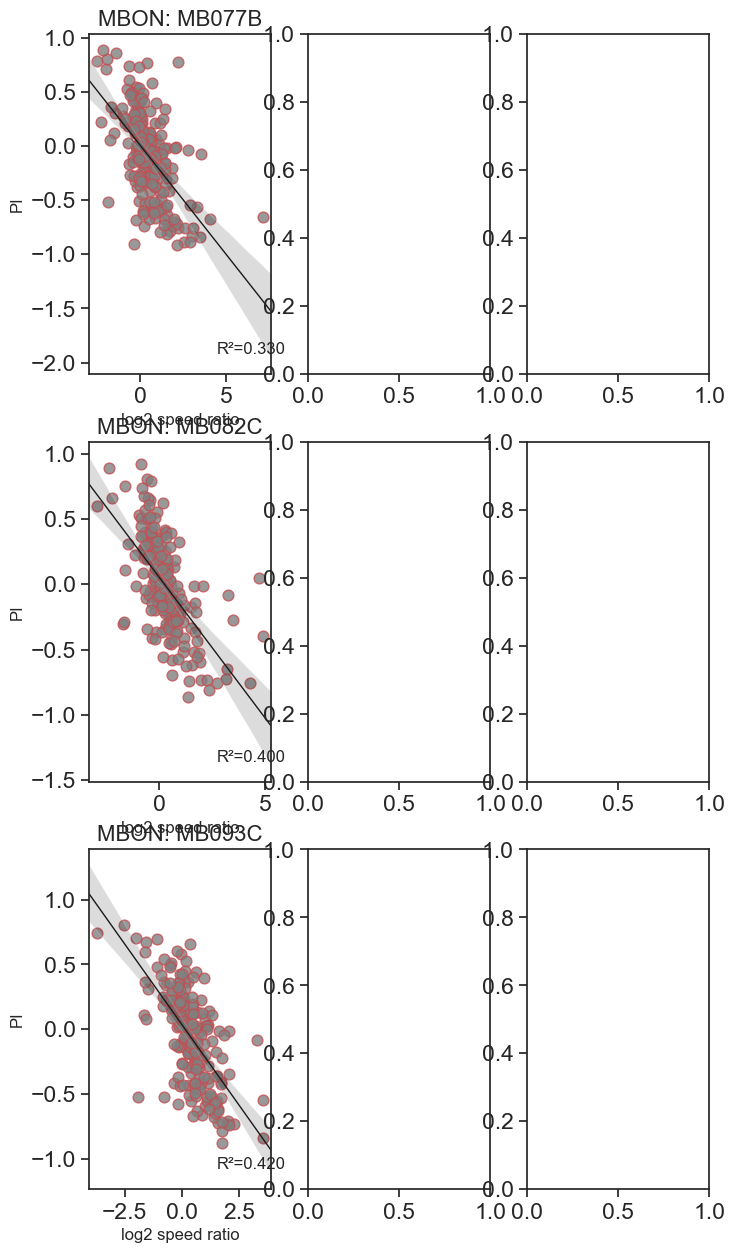

In [ ]:
import plotly.express as px
import seaborn as sns
df= df2
dfi=df2[(df2['light_intensity']=='Half')|(df2['light_intensity']=='Full') & (df2['status'] == 'Offspring')].copy()
dfi.replace([np.inf, -np.inf], np.nan, inplace=True)
dfi.rename(columns={'driver': 'MBON'}, inplace = True)

osar_data = dfi
dfrrr = pd.DataFrame()
sns.set(style='ticks', font_scale=1.5)
decimal_places = 2

f, ax = plt.subplots(nrows=3, ncols=3,figsize=(8,15))  #ACR

for name,row,col in zip(basegenotype, 3*[0,1,2,3], 3*[0]+3*[1]+3*[2]+3*[3]): 
    # ax[row][col].set_ylim(-1.1,1.1)  
    # ax[row][col].set_xlim(-6.1,6.1,2) 
    # ax[row][col].tick_params(axis='x', labelsize= 12)
    # ax[row][col].tick_params(axis='y', labelsize= 12)
    df=osar_data[osar_data['MBON']==name]
    ax[row][col].scatter(df['log2_speed_ratio_Pattern 01'], 
                df['pi_smoothed_Pattern 01'],
                color='grey',
                edgecolors="r",
                alpha=0.8,
                s=60)
    
    sns.regplot(df['log2_speed_ratio_Pattern 01'],
                df['pi_smoothed_Pattern 01'],
                scatter=False,
                line_kws={'lw':1}, 
                color="k",
                ax=ax[row][col],
                truncate=False)

    
    x = df['log2_speed_ratio_Pattern 01'].to_numpy()
    y = df['pi_smoothed_Pattern 01'].to_numpy()

    finiteMask = np.isfinite([x, y]).all(axis=0)
    
    corr = sp.stats.linregress(x[finiteMask], y[finiteMask])
    lowers, uppers = skb.ci((x[finiteMask], y[finiteMask]), 
                            statfunction=r2_and_slope, 
                            n_samples=3000)
    
    r2 = np.round(corr.rvalue**2, decimal_places)
    r2_lower = np.round(lowers[0], decimal_places)
    r2_upper = np.round(uppers[0], decimal_places)

    ax[row][col].annotate('R\u00b2='+str("{:.3f}".format(r2)), 
                     xy=(0.70, 0.05),  # xy coords
                     xycoords='axes fraction',
                     ha='left', va='bottom',
                     fontsize=12)
    ax[row][col].set_ylabel('PI', fontsize=12)
    ax[row][col].set_xlabel('log2 speed ratio', fontsize=12)
    ax[row][col].set_title("MBON: "+ name, fontsize = 16)
    

plt.tight_layout()

#plt.savefig("D:\\Nicole Lee - HDD\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\DATA\\osar_test\\Figure\\regressionhalffull20221125.png")0

In [ ]:
valencemd = meandiffchart(dfi, basegenotype, 'pi_smoothed_Pattern 01')
srmd = meandiffchart(dfi, basegenotype, 'log2_speed_ratio_Pattern 01')

totalmd = pd.DataFrame()
totalmd = pd.concat([valencemd,srmd.iloc[:,1]], axis = 1)
totalmd.rename(columns = {'pi_smoothed_Pattern 01':'PI MeanDiff', 'log2_speed_ratio_Pattern 01':'Speed Ratio MeanDiff'}, inplace = True)

print(totalmd)

C:\Users\lnico\AppData\Local\Temp\ipykernel_28252\3193222713.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tab1['difference'] = round(tab1['difference'],3)


       MBON  PI MeanDiff  Speed Ratio MeanDiff
0    MB077B       -0.044                -0.056
1    MB082C       -0.092                 0.187
2    MB093C        0.132                -0.400
3    MB112C       -0.131                -0.620
4    MB210C        0.049                 0.156
5    MB242A        0.070                -0.196
6    MB323B       -0.088                 0.387
7    MB434B        0.043                -0.207
8       R76       -0.159                 0.636
9  VT999036        0.688                -1.862


C:\Users\lnico\AppData\Local\Temp\ipykernel_28252\3193222713.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tab1['difference'] = round(tab1['difference'],3)


In [ ]:
def meandiffchart(dfi, basegenotype, parameter):
    
    dfr1 = pd.DataFrame()
    for names in basegenotype:
        dfrr = pd.DataFrame()
        filter1 = dfi[(dfi['MBON'] == names) & (dfi['status'] == 'Offspring')].copy().reset_index(drop=True)
        filter2 = dfi[(dfi['MBON'] == names) & (dfi['status'] == 'Sibling')].copy().reset_index(drop=True)

        dfrr[names + " Cntrl" ] = filter2[parameter]
        dfrr[names] = filter1[parameter]
        dfr1 = pd.concat([dfr1, dfrr], axis = 1)
    l = dfr1.columns.tolist()
    titlelst = list(zip(l,l[1:]))[::2]  
    test = dabest.load(dfr1, idx=titlelst, ci=90)
    tab1 = test.mean_diff.statistical_tests
    tab1['difference'] = round(tab1['difference'],3)
    tab = pd.concat([tab1['test'], tab1['difference']], axis=1)
    tab.rename(columns = {'test':'MBON', 'difference':parameter}, inplace = True)

    return tab

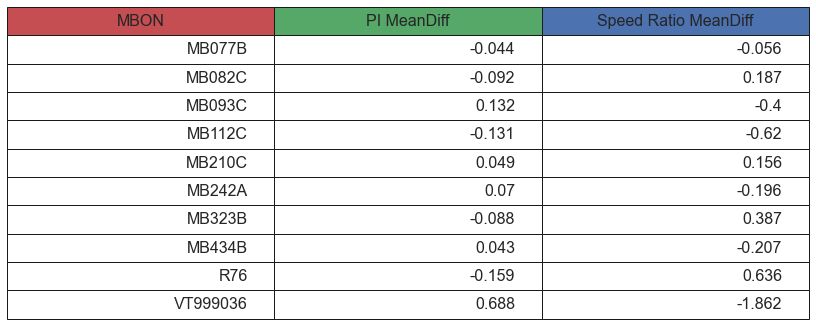

In [ ]:
fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

df = pd.DataFrame(np.random.randn(10, 4), columns=list('ABCD'))

tablele = ax.table(cellText=totalmd.values, colLabels=totalmd.columns, colColours = 'rgba(128,128,128,0.3)', loc='center')

fig.tight_layout()
tablele.scale(2, 2)
tablele.set_fontsize(16)

plt.show()
